In [2]:
#PART A
#load libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [3]:
#load data and add column headers
airline_df = pd.read_csv('Assignment 2—Problem 1_ airline_costs.csv', names=["Airline", "Flight_Length", "Plane_Speed", "Flight_Time", "Pop_Served", "Op_Costs", "Rev_Tons", "Ton_Mile", "Avail_Cap", "Tot_Assets", "Inv_SpFunds", "Adj_Assets"], index_col=0)
#preview data
airline_df.head()

,Flight_Length,Plane_Speed,Flight_Time,Pop_Served,Op_Costs,Rev_Tons,Ton_Mile,Avail_Cap,Tot_Assets,Inv_SpFunds,Adj_Assets
Airline,,,,,,,,,,,
All American,57,133,6.10,20200,116.3,0.96,0.400,2.400,21.13,3.21,17.92
American,270,216,6.93,56928,43.0,3.98,0.689,5.776,1436.53,165.22,1271.31
Bonanza,100,140,4.45,183,141.5,0.79,0.358,2.207,6.65,0.01,6.64
Braniff,176,182,6.60,11869,50.6,2.57,0.557,4.614,160.30,5.81,154.49
Capital,142,167,7.47,41097,51.0,2.68,0.510,5.255,195.02,6.06,188.96


In [4]:
#check for null values
airline_df.isnull().values.any()

False

In [5]:
#linear regression
#Use a linear regression model to predict the number of customers each airline serves from its length of the flight and daily flight time per plane.
y=airline_df.Pop_Served
X=airline_df[['Flight_Length', 'Flight_Time']]
X=sm.add_constant(X)
pop_model=sm.OLS(y, X).fit()
print(pop_model.summary())
print("Parameters: ", pop_model.params)
print("R2: ", pop_model.rsquared)

#linear equation from OLS regression results: number of customers = -7792.0706 + 183.2956*x - 213.3340*x

#predicted value for number of customers served for 200-mil flight and daily flight time 7.2 hours per plane

-7792.0706 + (183.2956*200) - (213.3340*7.2)

#predicted number of customers: 27,331,000 customers

                            OLS Regression Results                            
Dep. Variable:             Pop_Served   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     23.00
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           1.23e-06
Time:                        19:45:22   Log-Likelihood:                -330.06
No. Observations:                  31   AIC:                             666.1
Df Residuals:                      28   BIC:                             670.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7792.0706   8396.998     -0.928

/Users/laurensantos/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


27331.044600000005

In [6]:
#build another regression model to predict the total assets of an airline from the customer served by the airline

y=airline_df.Tot_Assets
X=airline_df.Pop_Served
X=sm.add_constant(X)
assets_model=sm.OLS(y, X).fit()
print(assets_model.summary())
print("Parameters: ", assets_model.params)
print("R2: ", assets_model.rsquared)

                            OLS Regression Results                            
Dep. Variable:             Tot_Assets   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     130.9
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           2.85e-12
Time:                        19:45:22   Log-Likelihood:                -202.95
No. Observations:                  31   AIC:                             409.9
Df Residuals:                      29   BIC:                             412.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -98.5080     41.633     -2.366      0.0

/Users/laurensantos/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [7]:
#linear equation from OLS regression results: total assets = -98.507986 + 0.021655*x

#prediction for total assets for an airline serving 20,300,000 customers
-98.507986 + (0.021655*20300)

#total assets prediction of $34,108,851.40

341.088514

In [8]:
#PART B
#load libraries
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt


#load data and add column headers
kangaroo_df = pd.read_csv('Assignment 2—Problem 2_ kangaroo’s nasal dimension data.csv', index_col=None)
kangaroo_df.head()


,X,Y
0,609,241
1,629,222
2,620,233
3,564,207
4,645,247


In [9]:
#check for null values
kangaroo_df.isnull().values.any()

False

In [10]:
#understanding the data through lin reg
y=kangaroo_df.Y
X=kangaroo_df.X
X=sm.add_constant(X)
kangaroo_model=sm.OLS(y, X).fit()
print(kangaroo_model.summary())

#line equation: y= 46.4508 + 0.2876      

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     149.7
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           1.34e-15
Time:                        19:45:26   Log-Likelihood:                -182.98
No. Observations:                  45   AIC:                             370.0
Df Residuals:                      43   BIC:                             373.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.4508     16.300      2.850      0.0

/Users/laurensantos/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


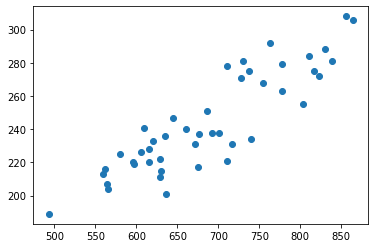

In [11]:
#using the gradient descent algorithm to predict the optimal intercept and gradient
X = kangaroo_df.iloc[:, 0] #get values of 1st column
Y = kangaroo_df.iloc[:, 1] #get values of 2nd column
plt.scatter(X, Y)
plt.show() #visualize data

In [12]:
X = kangaroo_df.iloc[:, 0] #get values of 1st column
Y = kangaroo_df.iloc[:, 1] #get values of 2nd column

def gradient_descent(X, Y):
    m1 = 0
    c1 = 0
    epochs = 1000 #define number of iterations
    n = len(X)
    L = 0.00000001 #learning rate

    for i in range(epochs):
        Y_Pred = m1 * X + c1
        cost = (1/n) * sum([val**2 for val in (Y-Y_Pred)])
        md = -(2/n)*sum(X*(Y-Y_Pred)) #m derivative
        cd = -(2/n)*sum(Y-Y_Pred) #c derivative
        m1 = m1 - L * md
        c1 = c1 - L * cd
        print ("m {}, c {}, cost {} iteration {}".format(m1, c1, cost, i))

gradient_descent(X, Y)

m 0.003404906666666667, c 4.883111111111111e-06, cost 60505.17777777778 iteration 0
m 0.006777064339688299, c 9.719411467706668e-06, cost 59351.4118271978 iteration 1
m 0.01011678800466728, c 1.4509351303887513e-05, cost 58219.73339171089 iteration 2
m 0.013424389617618866, c 1.9253376523323432e-05, cost 57109.719631379055 iteration 3
m 0.016700178134110285, c 2.3951928740903988e-05, cost 56020.955801046 iteration 4
m 0.01994445953811957, c 2.8605445323988776e-05, cost 54953.035095371946 iteration 5
m 0.023157536870616845, c 3.3214359433260916e-05, cost 53905.55849683494 iteration 6
m 0.026339710257870675, c 3.77791000631876e-05, cost 52878.134626642175 iteration 7
m 0.029491276939482197, c 4.23000920820915e-05, cost 51870.3795984952 iteration 8
m 0.032612531296149584, c 4.677775627183677e-05, cost 50881.91687515497 iteration 9
m 0.03570376487716549, c 5.1212509367133294e-05, cost 49912.377127752494 iteration 10
m 0.03876526642765, c 5.5604764094462945e-05, cost 48961.39809779296 itera

m 0.3537432509744136, c 0.0005177068484186667, cost 236.9625733160315 iteration 744
m 0.353745792437389, c 0.0005177266869612447, cost 236.9619179335007 iteration 745
m 0.3537483094559021, c 0.0005177464905633928, cost 236.96127509700796 iteration 746
m 0.3537508022650639, c 0.0005177662595611743, cost 236.96064456637367 iteration 747
m 0.3537532710977243, c 0.0005177859942874202, cost 236.9600261060166 iteration 748
m 0.3537557161844936, c 0.0005178056950717599, cost 236.95941948486526 iteration 749
m 0.35375813775376386, c 0.0005178253622406527, cost 236.95882447627156 iteration 750
m 0.3537605360317306, c 0.0005178449961174178, cost 236.95824085792674 iteration 751
m 0.3537629112424136, c 0.0005178645970222647, cost 236.95766841177743 iteration 752
m 0.3537652636076782, c 0.0005178841652723231, cost 236.95710692394533 iteration 753
m 0.35376759334725555, c 0.0005179037011816725, cost 236.95655618464534 iteration 754
m 0.35376990067876357, c 0.0005179232050613715, cost 236.9560159881

In [1]:
# m=0.35400729758830524; c=0.0006518631757614075

#For kangaroo_df, the optimal intercept is 0.0.0006518631757614075 and the optimal gradient is 0.35400729758830524